In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
ab = pd.read_csv('../data/medium/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/medium/Best_Know1Fxs.csv', header=None).values[0]
bestKnow = bestKnow[:100].astype(float)
java_results = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).values[0]
java_results = java_results[:-1].astype(float)
java_results_all = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).iloc[:,:-1]

In [3]:
D = 30
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

A proper report should be shown here :)
Total time: 00:16


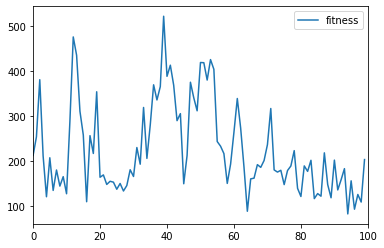

In [4]:
opt.run(total_generations)

In [5]:
df = pd.DataFrame({'java':java_results, 'bestKnow':bestKnow[:-1], 'results': opt.recorder.best_times_fitness[:-1]})

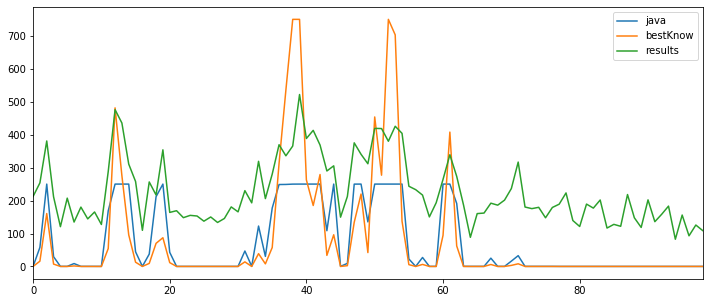

In [6]:
df.plot(figsize=(12,5))

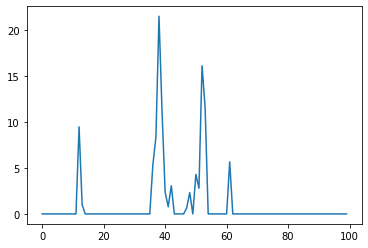

In [7]:
plt.plot([e.constraints_sum for e in opt.recorder.best_times])

# Multiple runs

In [8]:
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
        .create_multiple_runs(n_runs=10))

In [9]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


In [10]:
runs.times_data

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,165.626752,180.821560,175.082305,182.124075,205.680812,146.019793,172.516244,194.553554,230.791192,170.651717
1,180.442838,206.886887,266.064056,174.090714,234.324055,347.322315,246.807903,186.736538,278.424857,188.873874
2,259.142587,418.887253,342.610633,379.259243,282.890169,404.220948,352.742545,369.215033,369.005774,457.191036
3,188.627569,263.754309,199.900398,129.677796,264.967781,134.677116,327.850886,232.581018,286.499093,293.147858
4,163.496881,160.681187,181.041086,138.725420,195.089368,129.969658,81.713242,135.879221,166.193270,183.621923
5,140.675310,170.405096,151.115864,146.361619,149.114008,133.821144,141.402875,160.296553,188.196426,120.648114
6,310.503956,238.321031,273.909885,219.754212,155.984679,191.051149,251.543087,245.408617,244.288533,215.263722
7,190.602156,189.706052,228.164516,166.367074,155.165252,277.291515,156.830528,189.821633,178.251774,119.965758
8,158.658656,137.912449,212.511082,199.255227,165.005122,149.085435,140.913585,187.627254,157.780396,216.945989
9,154.094779,143.769236,151.069966,104.746293,95.179655,121.353333,163.683172,102.445529,122.083557,151.629413


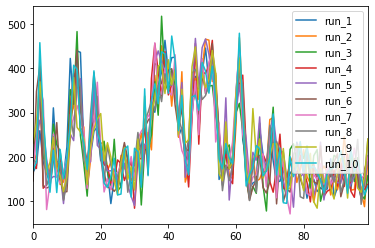

In [11]:
runs.times_data.plot();

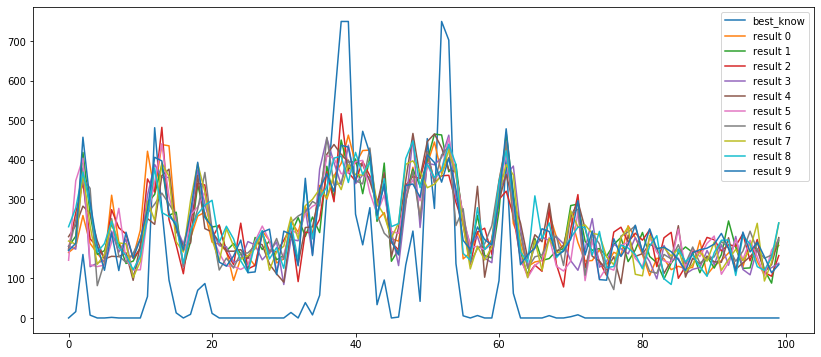

In [12]:
plt.figure(figsize=(14,6))
plt.plot(bestKnow, '-', label='best_know')
for i,opt in enumerate(runs.optimizations):
    plt.plot(opt.recorder.best_times_fitness, '-', label=f'result {i}')
plt.legend()

# --